<a href="https://colab.research.google.com/github/pravirajain/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("/content/sample_data/Netflix Userbase.csv")
np.random.seed(1)
print(f"In this dataset {data.shape[0]} rows and {data.shape[1]} columns")
data.sample(n=5)

In this dataset 2500 rows and 10 columns


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
1406,1407,Basic,14,31-10-22,04-07-23,Canada,45,Female,Smart TV,1 Month
297,298,Standard,14,03-11-22,27-06-23,Mexico,41,Male,Tablet,1 Month
1276,1277,Premium,11,30-09-22,04-07-23,Brazil,30,Male,Smartphone,1 Month
2368,2369,Standard,11,24-09-22,13-07-23,Australia,40,Female,Smartphone,1 Month
438,439,Standard,12,23-10-22,27-06-23,Spain,37,Female,Smart TV,1 Month


In [3]:
'''
   we dont have userID so we can
       that userID
       '''
data.drop("User ID",axis=1,inplace=True)
data.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
data.dtypes

Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [5]:
data.isnull().sum()

Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [6]:
#check the duplicate values

duplicates = data[data.duplicated()]

if duplicates.empty:
    print("No duplicates Found!")
else:
    print("Duplicates Found")
    print(duplicates)


No duplicates Found!


In [7]:
'''
 changing dates in the datetime format
 '''
data["Join Date"] = pd.to_datetime(data["Join Date"])
data["Last Payment Date"] = pd.to_datetime(data["Last Payment Date"])

'''
   Handling the datetime features
   '''
data["Join Year "] = data["Join Date"].dt.year
data["Join Month "] = data["Join Date"].dt.month
data["Last Payment Year"] = data["Last Payment Date"].dt.year
data["Last Payment Month"] = data["Last Payment Date"].dt.month
data["Account till"] = (pd.to_datetime("today")-data["Join Date"]).dt.days
data.head()


,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join Year,Join Month,Last Payment Year,Last Payment Month,Account till
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,2022,1,2023,10,582
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,2021,5,2023,6,833
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023,2,2023,6,173
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,2022,10,2023,6,317
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023,1,2023,6,227


In [8]:
data.rename(columns={"Plan Duration":"Plan Duration(months)"},
           inplace = True)

for i in range(len(data)):
    data["Plan Duration(months)"] = data["Plan Duration(months)"][i][0]
data.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration(months),Join Year,Join Month,Last Payment Year,Last Payment Month,Account till
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1,2022,1,2023,10,582
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1,2021,5,2023,6,833
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1,2023,2,2023,6,173
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1,2022,10,2023,6,317
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1,2023,1,2023,6,227


In [9]:
"""Adding new columns are filled with dummy values
   based on previous features
   """
#Feature encoding
subscription_type_en = pd.get_dummies(data["Subscription Type"],prefix="subscription type")
data = pd.concat([data, subscription_type_en],axis=1)

Country_en = pd.get_dummies(data["Country"],prefix="Country_type")
data = pd.concat([data, Country_en],axis=1)

Gender_en = pd.get_dummies(data["Gender"],prefix="Gender_type")
data = pd.concat([data, Gender_en],axis=1)

Device_en = pd.get_dummies(data["Device"],prefix="Device_type")
data = pd.concat([data, Device_en],axis=1)

#feature transform
data["Age Bins"] = pd.cut(data["Age"],
                  bins=[0,18,28,38,48,58,100],
                          labels=["<18","18-27","28-37","38-47","48-57","58+"])
data.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration(months),Join Year,...,Country_type_Spain,Country_type_United Kingdom,Country_type_United States,Gender_type_Female,Gender_type_Male,Device_type_Laptop,Device_type_Smart TV,Device_type_Smartphone,Device_type_Tablet,Age Bins
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1,2022,...,0,0,1,0,1,0,0,1,0,18-27
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1,2021,...,0,0,0,1,0,0,0,0,1,28-37
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1,2023,...,0,1,0,0,1,0,1,0,0,38-47
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1,2022,...,0,0,0,1,0,1,0,0,0,48-57
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1,2023,...,0,0,0,0,1,0,0,1,0,28-37


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Subscription Type            2500 non-null   object        
 1   Monthly Revenue              2500 non-null   int64         
 2   Join Date                    2500 non-null   datetime64[ns]
 3   Last Payment Date            2500 non-null   datetime64[ns]
 4   Country                      2500 non-null   object        
 5   Age                          2500 non-null   int64         
 6   Gender                       2500 non-null   object        
 7   Device                       2500 non-null   object        
 8   Plan Duration(months)        2500 non-null   object        
 9   Join Year                    2500 non-null   int64         
 10  Join Month                   2500 non-null   int64         
 11  Last Payment Year            2500 non-null 

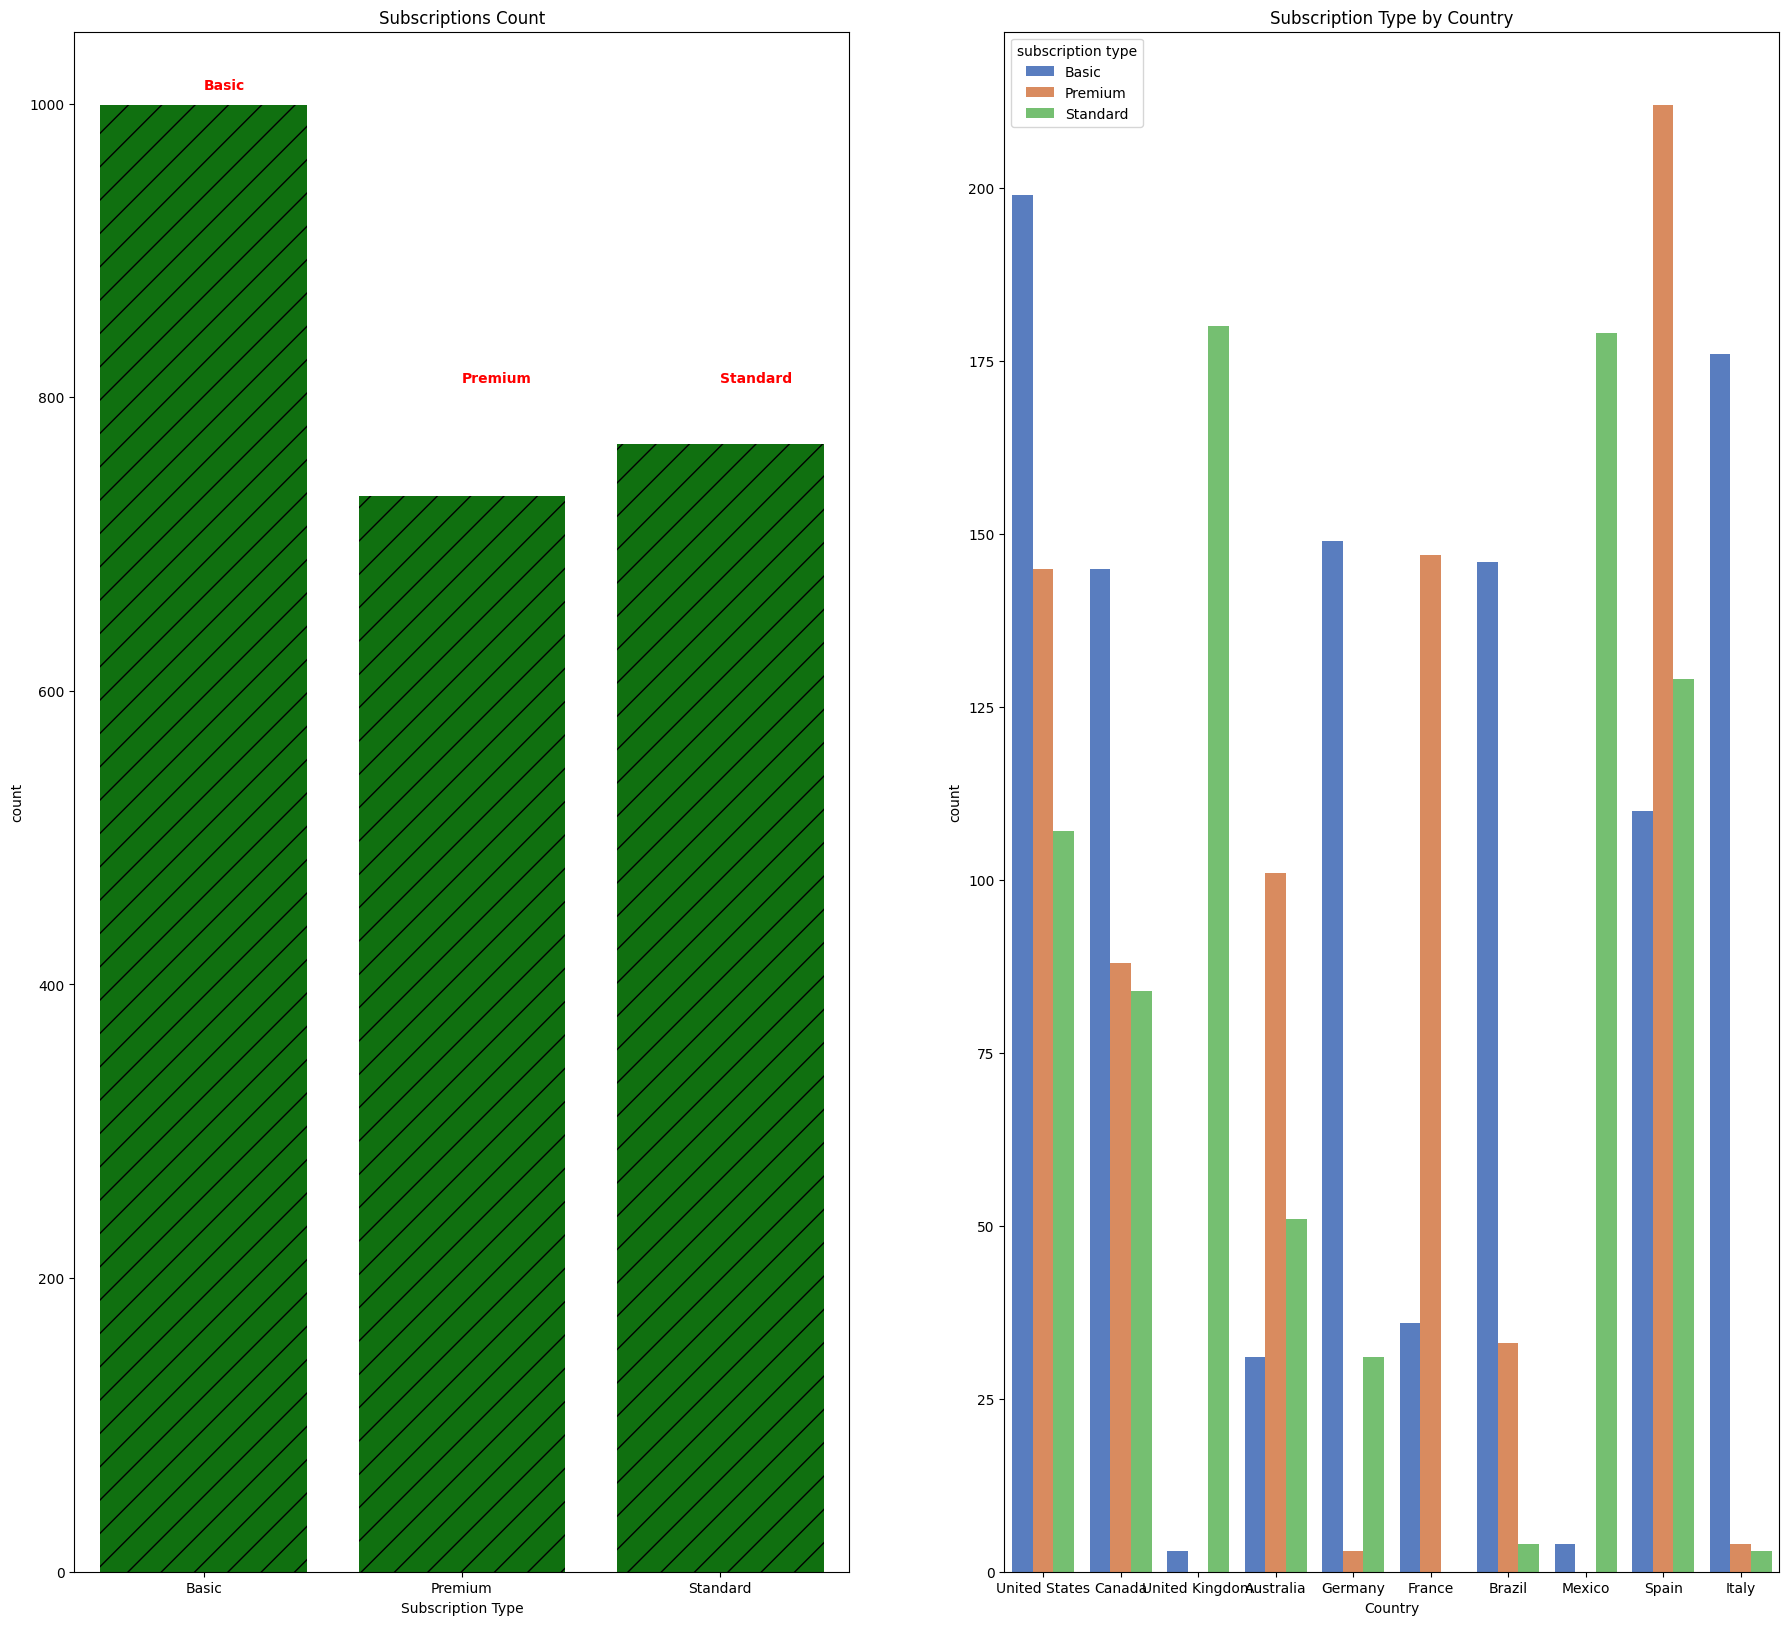

In [12]:
#check if which subscription is higher and subscription type
plt.figure(figsize=(22,20))
plt.subplot(1,2,1)
plt.title("Subscriptions Count")
sns.countplot(x="Subscription Type",
              data=data,
              color="green",hatch="/")
#apply text on plots
plt.text(0,1010,"Basic",fontsize=10
         ,fontweight="bold",
        color="red")

plt.text(1,810,"Premium",fontsize=10
         ,fontweight="bold",
        color="red")

plt.text(2,810,"Standard",fontsize=10,
        fontweight="bold",
 color="red")

plt.subplot(1,2,2)
sns.countplot(data=data,x="Country",
              hue="Subscription Type",
              palette="muted")

plt.title("Subscription Type by Country")
plt.xlabel("Country")
plt.ylabel("count")
plt.legend(title="subscription type")
plt.show()

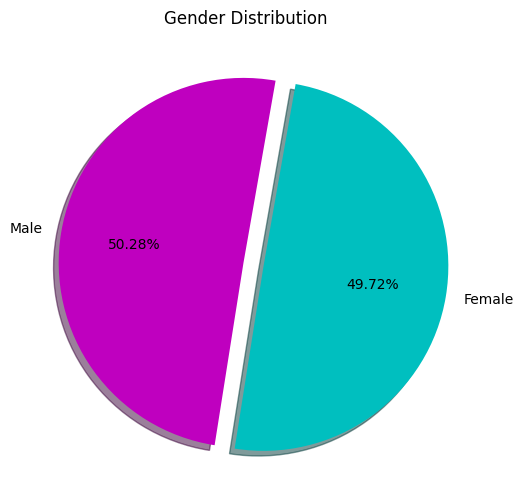

In [13]:
#gender distribution
plt.figure(figsize=(8,6))
gender = data.Gender.value_counts()
index = ["Male","Female"]
colors = ["m","c"]
exp = [0.01,0.1]
values= gender.values.tolist()

plt.pie(values,
        labels=index,
        autopct="%.2f%%",
       colors=colors,
        explode=exp,
        shadow=True,
        startangle=80)
plt.title('Gender Distribution')
plt.show()

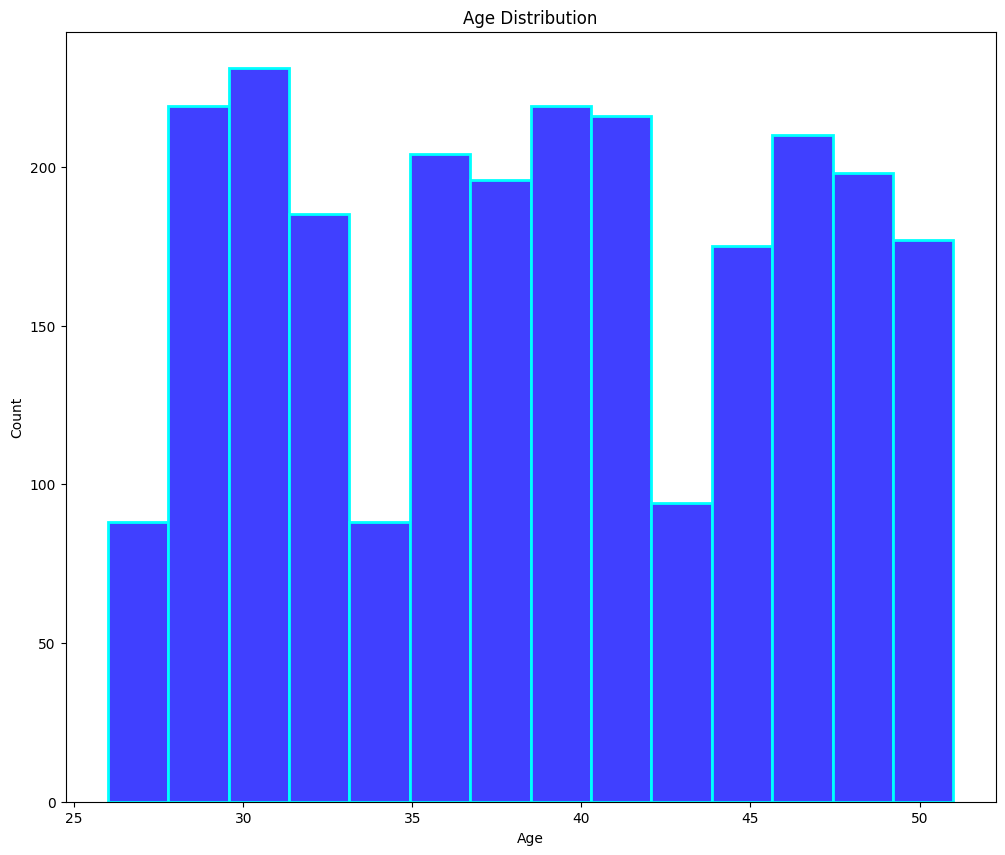

In [14]:
#age distribution
plt.figure(figsize=(12,10))
sns.histplot(data=data,
             x="Age",
             stat="count",
            color="b",
             edgecolor="cyan",
            lw=2)
plt.title("Age Distribution")
plt.show()

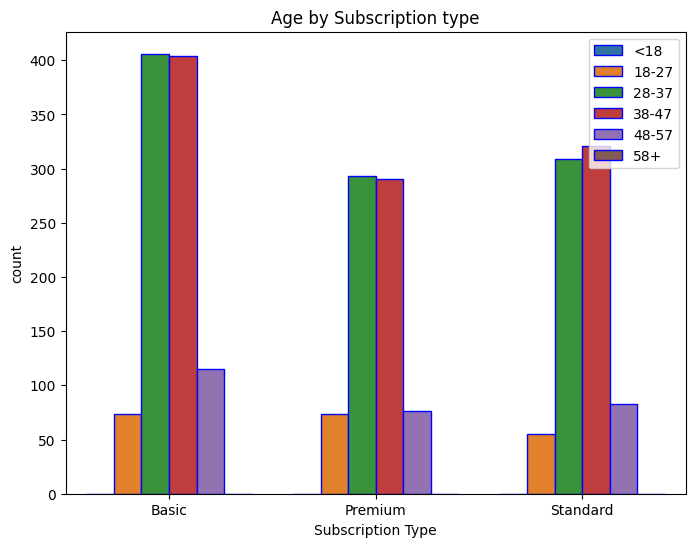

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,
              x="Subscription Type",
            hue="Age Bins",
              edgecolor="blue",
              lw=1
            )
plt.title("Age by Subscription type")
plt.legend(loc="upper right")
plt.show()

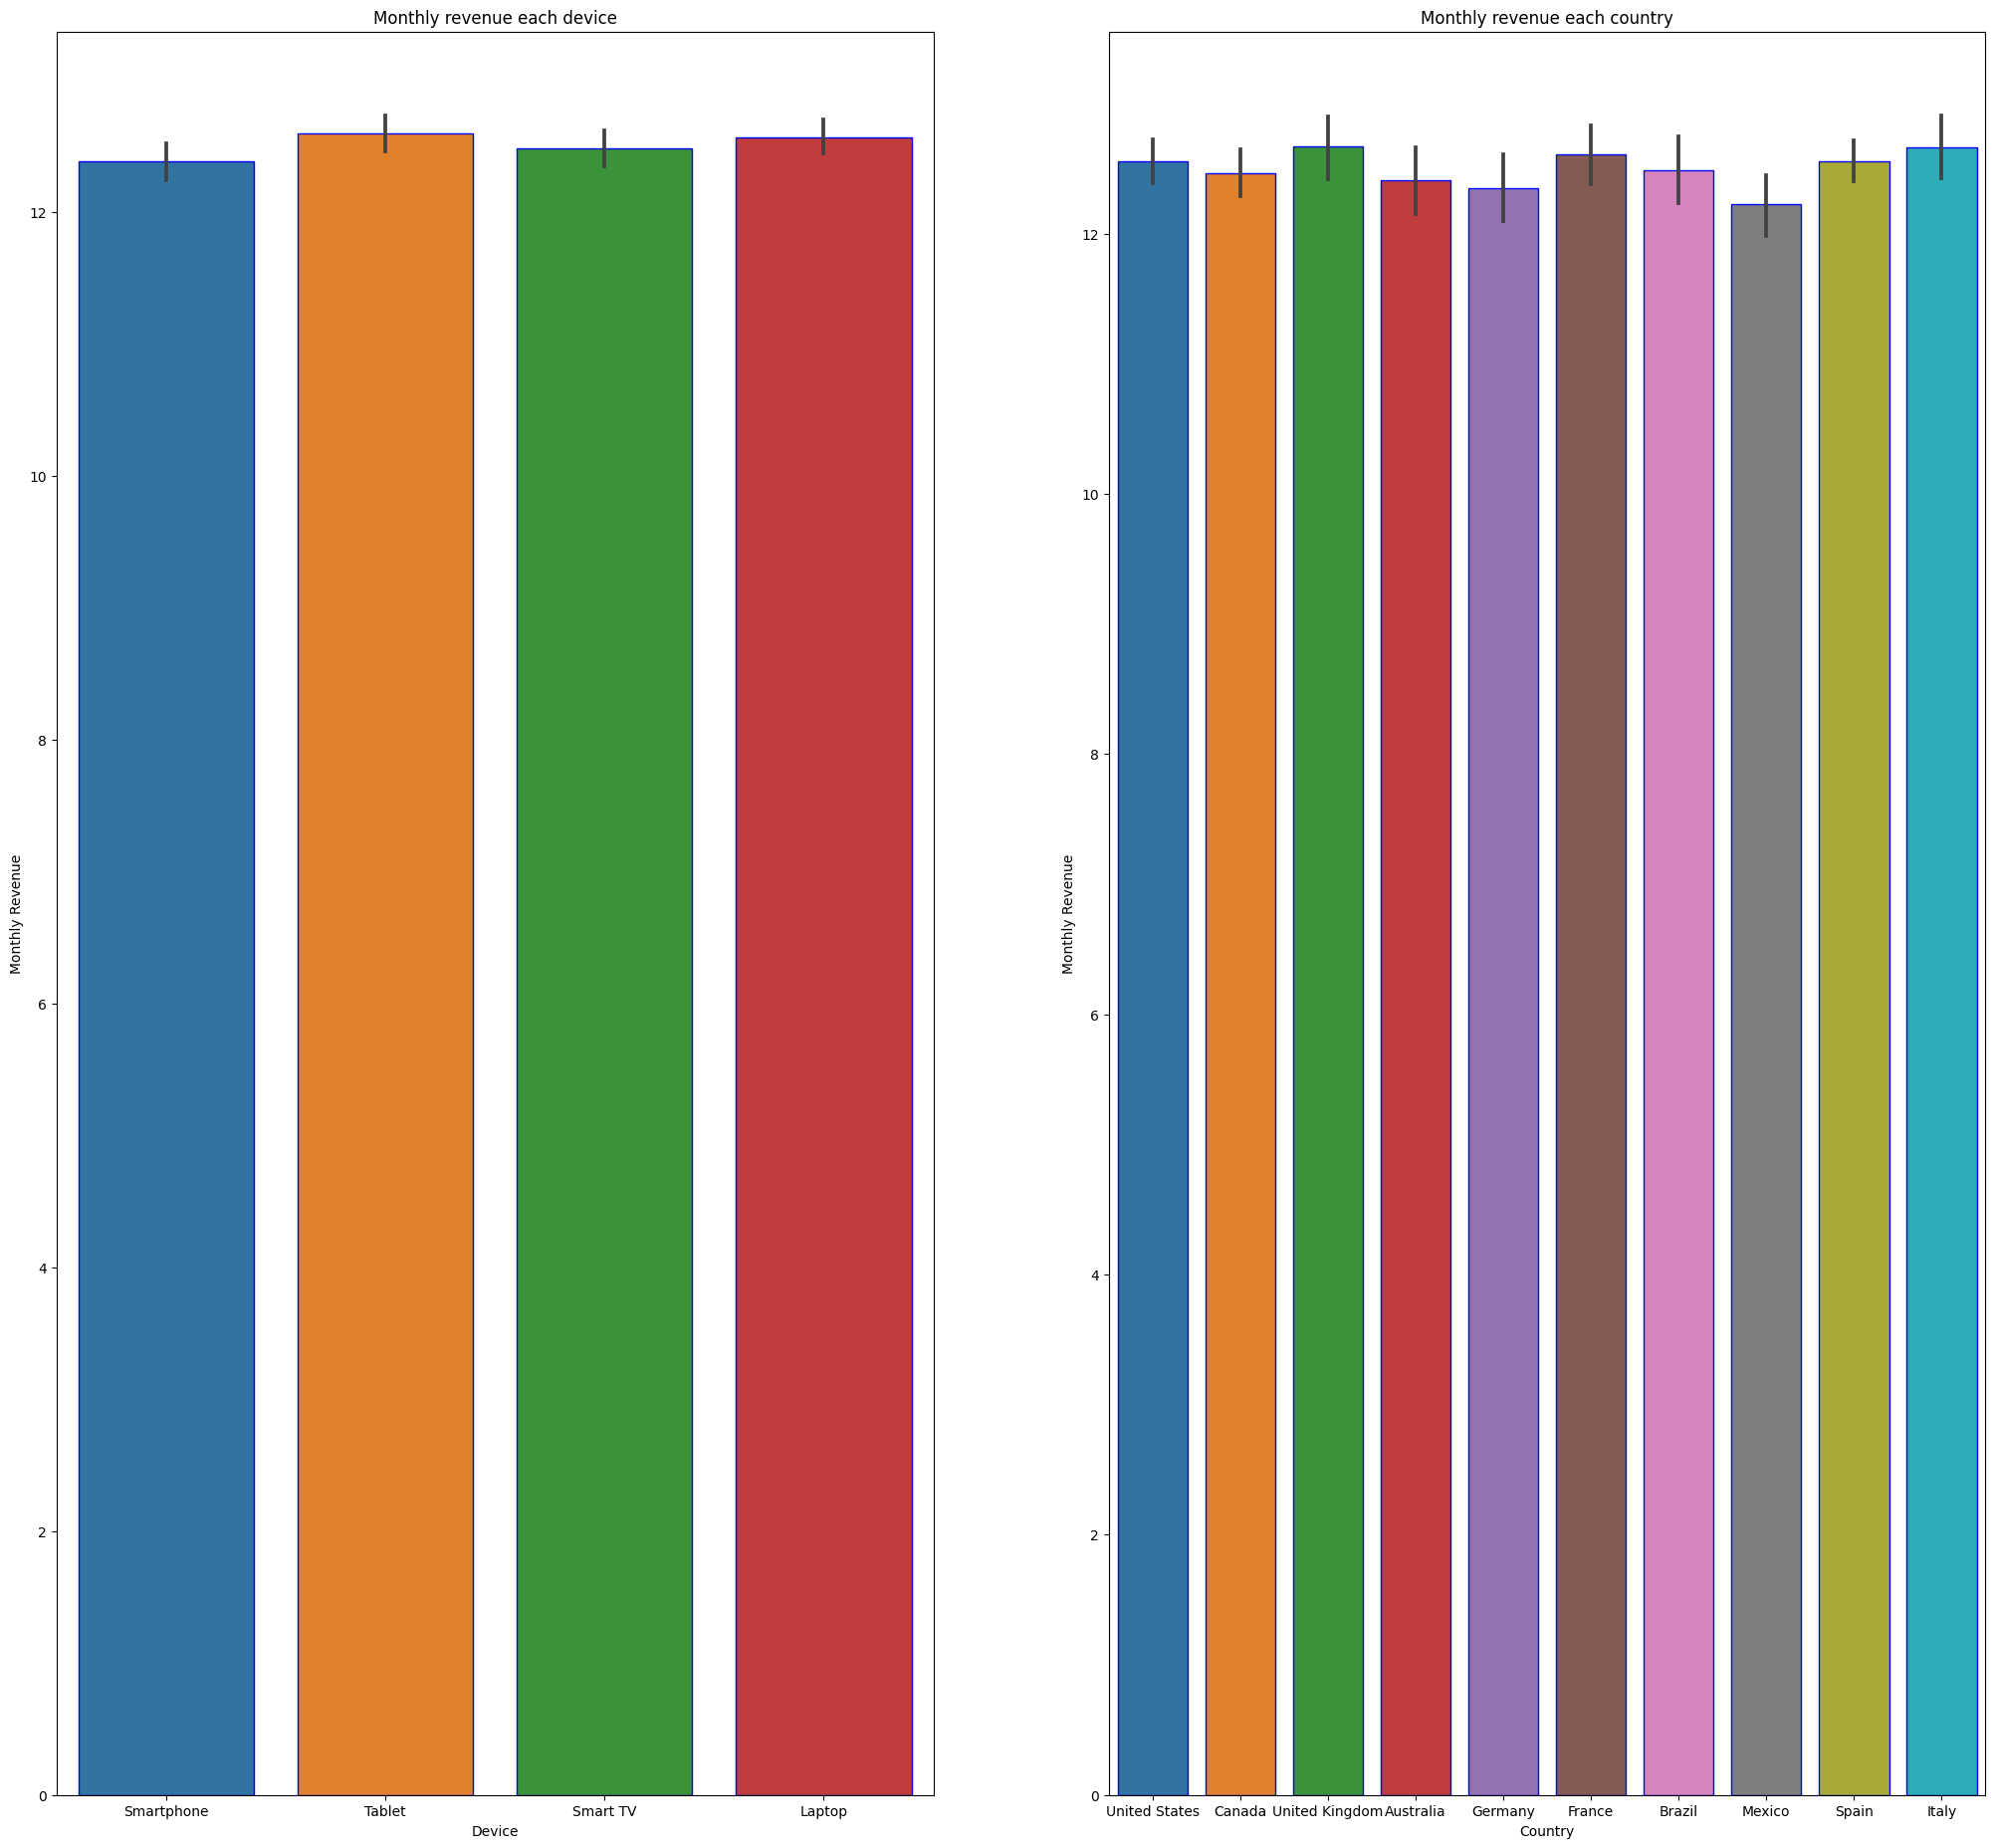

In [16]:
#monthly revenue by country and device revenue monthly
plt.figure(figsize=(25,23))
plt.subplot(1,2,1)
#device by revenue
sns.barplot(x="Device",
            y ="Monthly Revenue",
            data=data,
           edgecolor="blue")
plt.title("Monthly revenue each device")
#country by revenue
plt.subplot(1,2,2)
sns.barplot(x="Country",
            y="Monthly Revenue",
            data=data,
           edgecolor="blue")
plt.title("Monthly revenue each country")
plt.show()

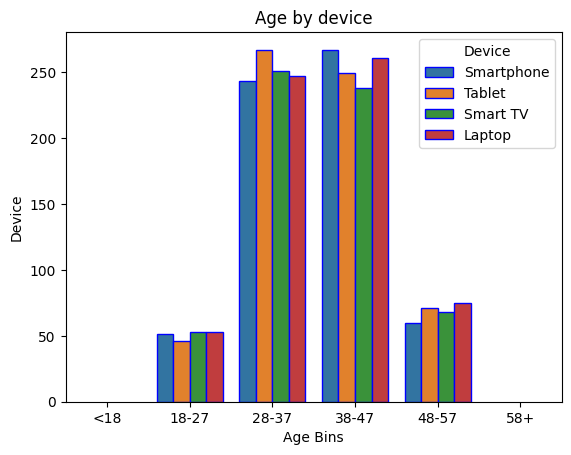

In [17]:
#People of this age are using this device
sns.countplot(x="Age Bins",
              hue="Device",
              data=data,
             edgecolor="blue",
             lw=1)
plt.title("Age by device")
plt.ylabel("Device")
plt.show()

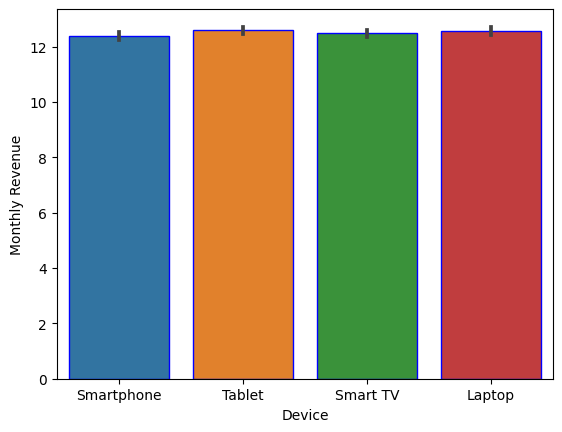

In [18]:
#monthly revenue by device
sns.barplot(x="Device",
            y="Monthly Revenue",
            data=data,
            edgecolor="blue"
           )
plt.show()

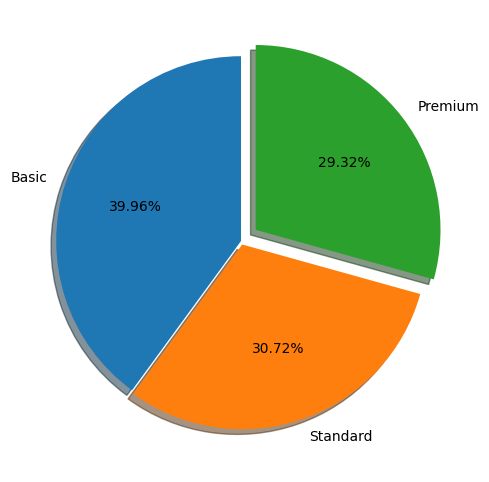

In [19]:
#percentage of subscription
x = data["Subscription Type"].value_counts(ascending=False)
index = [i for i in x.index]
var = [0,0.02,0.1]
plt.figure(figsize=(8,6))
plt.pie(x.values,
        labels=index,
        autopct="%.2f%%",
        explode=var,
        shadow=True,
        startangle=90)
plt.show()

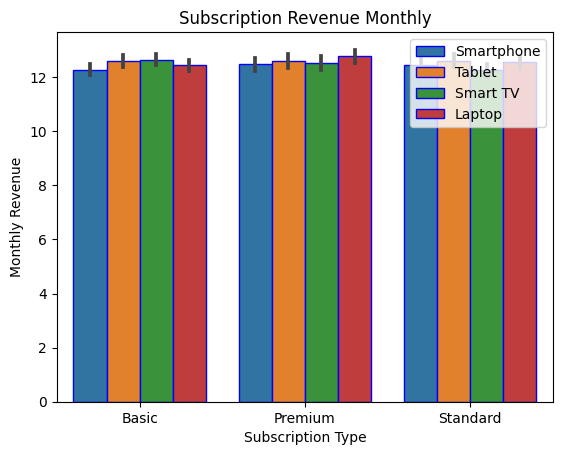

In [20]:
#Subscription revenue every month
sns.barplot(x="Subscription Type",
            y="Monthly Revenue",
            hue="Device",
            data=data,
           edgecolor="blue",
           lw=1)
plt.legend(loc="upper right")
plt.title("Subscription Revenue Monthly")
plt.show()

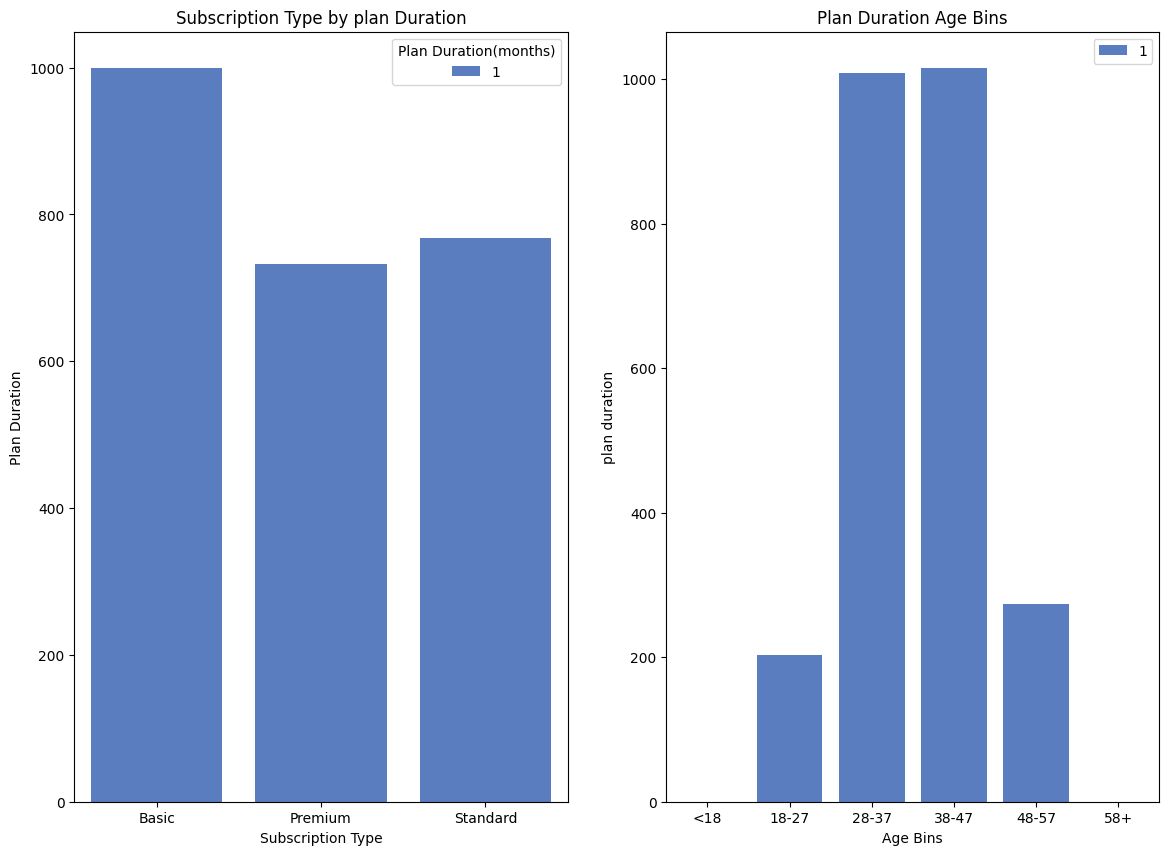

In [21]:
#subscription type by plan duration
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.countplot(data=data,
              x="Subscription Type",
              hue="Plan Duration(months)",
             palette="muted")
plt.title("Subscription Type by plan Duration")
plt.ylabel("Plan Duration")
#plan duration of ages
plt.subplot(1,2,2)
sns.countplot(data=data,
              x="Age Bins",
              hue="Plan Duration(months)",
             palette="muted")
plt.legend(loc="upper right")
plt.title("Plan Duration Age Bins")
plt.ylabel("plan duration")
plt.show()

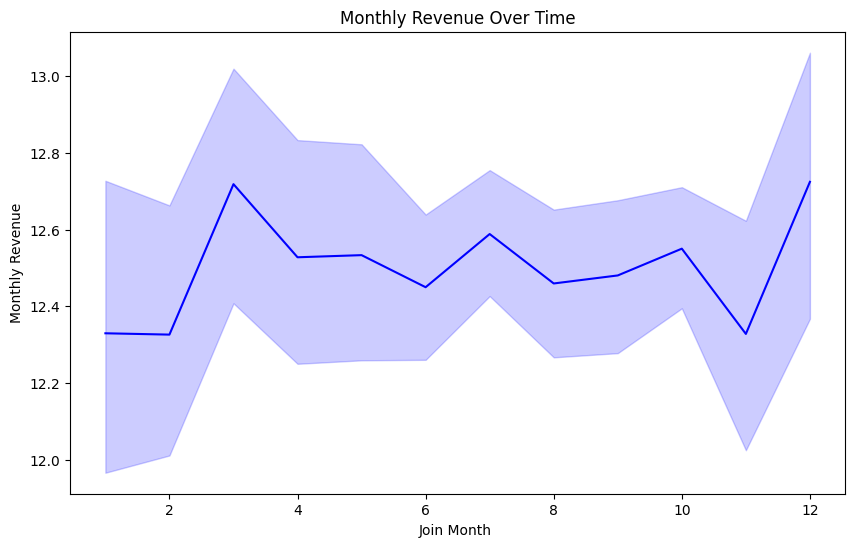

In [22]:
#Monthly revenue
plt.figure(figsize=(10,6))
sns.lineplot(x="Join Month ",
             y="Monthly Revenue",
             data=data,
             estimator= "mean",
            color="blue")
plt.title("Monthly Revenue Over Time")
plt.show()